In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [77]:
df1 = pd.read_excel('Time data/time_week01.xlsx')

In [85]:
df1.head()

,Task,Start Date,Start Time,End Date,End Time,Duration (h),Duration (decimal)
0,Audiovisual,04/07/2021,16:50:28,04/07/2021,17:31:41,00:41:13,0.69
1,Audiovisual,04/07/2021,16:20:53,04/07/2021,16:48:17,00:27:24,0.46
2,Audiovisual,04/07/2021,15:33:25,04/07/2021,16:13:01,00:39:36,0.66
3,Text with visuals,04/07/2021,14:51:11,04/07/2021,15:32:30,00:41:19,0.69
4,Audiovisual,04/07/2021,11:00:27,04/07/2021,11:25:45,00:25:18,0.42


In [107]:
def time_to_decimal(t):
    (h, m, s) = t.split(':')
    return int(m)/60

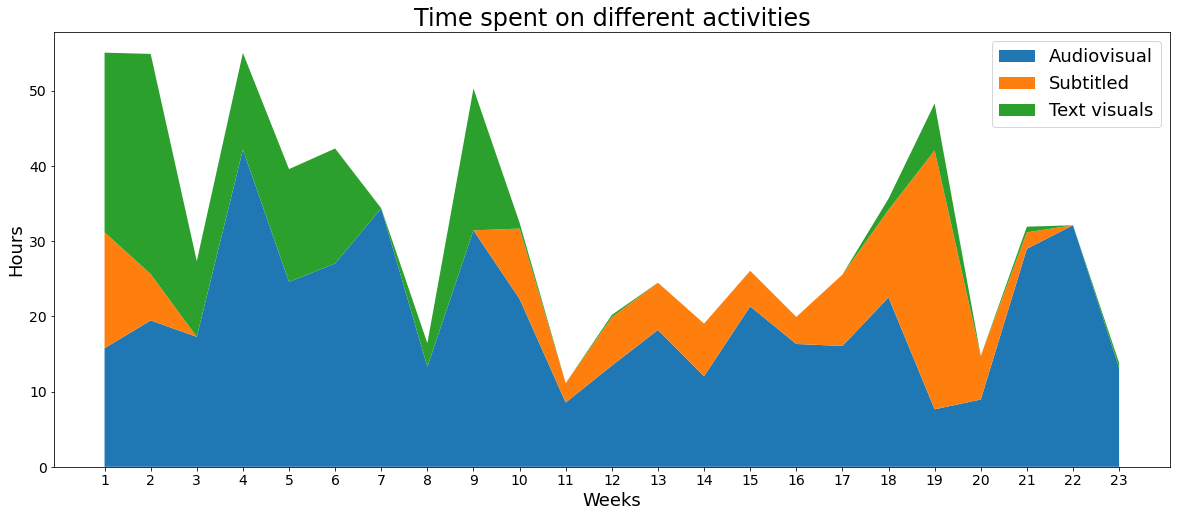

In [145]:
def create_plot():
    
    weeks = []
    audiovisual = []
    subtitled = []
    text_visuals = []

    filenames = glob.glob('Time data/*.xlsx')
    
    for file in filenames:
        week_n = file.strip('.xlsx')[-2:]
        week_df = pd.read_excel(file)
        
        if 'Duration (decimal)' not in week_df.columns:
            week_df['Duration (decimal)'] = df1['Duration (h)'].apply(time_to_decimal)
       
        weeks.append(int(week_n))
        audiovisual.append(week_df['Duration (decimal)'][week_df['Task'] == 'Audiovisual'].sum())
        subtitled.append(week_df['Duration (decimal)'][week_df['Task'] == 'Subtitled'].sum())
        text_visuals.append(week_df['Duration (decimal)'][week_df['Task'] == 'Text with visuals'].sum())
    
    
    plt.figure(figsize=(20,8))
    plt.stackplot(weeks, audiovisual, subtitled, text_visuals,
                  labels=['Audiovisual', 'Subtitled', 'Text visuals'],
                  baseline='zero', cmap='viridis')
    plt.ylabel('Hours', size=18)
    plt.xlabel('Weeks', size=18)
    plt.xticks(range(1,24),size=14)
    plt.yticks(size=14)
    plt.legend(prop={'size': 18})
    plt.title('Time spent on different activities', size=24)
    plt.savefig('plot.png', bbox_inches='tight', facecolor='white', edgecolor='white', transparent=False)
    plt.show()
    
create_plot()